**Feature Selection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [19]:
# Upload the selected dataset for this project
data = pd.read_csv('Major_Crime_Indicators_Open_Data.csv')

In [20]:
# Cleaning dataset based on previous step DATA CLEANING AND PRE-PROCESSING

# Removing duplicate rows from the dataset
data.drop_duplicates(subset = ['EVENT_UNIQUE_ID'], inplace = True)
# Omitting missing values
data.dropna(inplace=True)
# Dropping rows containing years of crime occurrence from 2000 to 2013
drop_rows = data['OCC_YEAR'].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])
data.drop(data[drop_rows].index, inplace=True)
# Dropping NSA from HOOD_158 and NEIGHBOURHOOD_158
filtered_indices = data[(data['HOOD_158'] == 'NSA') | (data['NEIGHBOURHOOD_158'] == 'NSA')].index
data.drop(filtered_indices, inplace=True)

In [21]:
data

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
2,-8.832825e+06,5.419631e+06,3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
5,-8.840629e+06,5.412225e+06,6,GO-20141260618,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,81,Trinity-Bellwoods,81,Trinity-Bellwoods (81),-79.416718,43.655115
6,-8.839460e+06,5.423396e+06,7,GO-20141260730,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,105,Lawrence Park North,105,Lawrence Park North (105),-79.406223,43.727681
7,-8.813613e+06,5.428591e+06,8,GO-20141260831,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,136,West Hill,136,West Hill (136),-79.174031,43.761395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372893,-8.849874e+06,5.425325e+06,372894,GO-20232989815,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,210,Unlawfully In Dwelling-House,Break and Enter,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),-79.499768,43.740196
372894,-8.832825e+06,5.419631e+06,372895,GO-20232989838,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1430,100,Assault,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
372895,-8.838191e+06,5.415297e+06,372896,GO-20232989777,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,2120,200,B&E,Break and Enter,95,Annex,95,Annex (95),-79.394825,43.675083
372896,-8.851986e+06,5.429799e+06,372897,GO-20232990411,2023/12/31 05:00:00+00,2023/12/31 05:00:00+00,2023,December,31,365,...,1610,100,Robbery With Weapon,Robbery,24,Black Creek,24,Black Creek (24),-79.518742,43.769232


In [22]:
# Counting unique values in each variable and determining if they are categorical
warnings.simplefilter(action='ignore', category=FutureWarning)
determ_categorical = pd.DataFrame(columns=['Variable', 'Unique Values', 'Categorical'])
for column in data.columns:
    unique_values = data[column].nunique()
    total_values = len(data[column])
    categorical = unique_values / total_values < 0.05
    determ_categorical = determ_categorical.append({'Variable': column, 'Unique Values': unique_values, 'Categorical': categorical}, ignore_index=True)
print(determ_categorical)

             Variable Unique Values Categorical
0                   X         19035       False
1                   Y         19034       False
2            OBJECTID        318654       False
3     EVENT_UNIQUE_ID        318654       False
4         REPORT_DATE          3652        True
5            OCC_DATE          3652        True
6         REPORT_YEAR            10        True
7        REPORT_MONTH            12        True
8          REPORT_DAY            31        True
9          REPORT_DOY           366        True
10         REPORT_DOW             7        True
11        REPORT_HOUR            24        True
12           OCC_YEAR            10        True
13          OCC_MONTH            12        True
14            OCC_DAY            31        True
15            OCC_DOY           366        True
16            OCC_DOW             7        True
17           OCC_HOUR            24        True
18           DIVISION            17        True
19      LOCATION_TYPE            54     

In [23]:
# Dropping irrelevant variables (ID-related)
attributes_to_drop = ['OBJECTID', 'EVENT_UNIQUE_ID']
data.drop(columns = attributes_to_drop, inplace = True)

In [24]:
# Encoding categorical variables
categorical_columns = ['REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'OCC_MONTH',
                       'OCC_DOW', 'REPORT_HOUR', 'OCC_YEAR', 'OCC_DAY', 'OCC_DOY', 'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE',
                       'MCI_CATEGORY', 'HOOD_140', 'NEIGHBOURHOOD_140', 'HOOD_158', 'NEIGHBOURHOOD_158']
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [25]:
data

,X,Y,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,0,0,0,4,0,0,6,1,...,2,0,5,0,42,141,36,106,-79.132915,43.780413
2,-8.832825e+06,5.419631e+06,0,0,0,4,0,0,6,0,...,1,0,11,0,114,133,91,119,-79.346615,43.703234
5,-8.840629e+06,5.412225e+06,0,0,0,4,0,0,6,5,...,2,0,5,0,140,134,120,120,-79.416718,43.655115
6,-8.839460e+06,5.423396e+06,0,0,0,4,0,0,6,3,...,2,0,5,0,6,80,7,68,-79.406223,43.727681
7,-8.813613e+06,5.428591e+06,0,0,0,4,0,0,6,3,...,2,0,5,0,36,138,41,124,-79.174031,43.761395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372893,-8.849874e+06,5.425325e+06,3651,3651,9,2,30,364,3,13,...,15,11,48,2,84,53,58,45,-79.499768,43.740196
372894,-8.832825e+06,5.419631e+06,3651,3651,9,2,30,364,3,13,...,2,0,5,0,114,133,91,119,-79.346615,43.703234
372895,-8.838191e+06,5.415297e+06,3651,3651,9,2,30,364,3,12,...,15,10,12,2,153,3,135,3,-79.394825,43.675083
372896,-8.851986e+06,5.429799e+06,3651,3651,9,2,30,364,3,14,...,13,0,36,3,83,15,57,13,-79.518742,43.769232


In [26]:
# Splitting dataset in train and test sets
seed = 123
X = data.drop('MCI_CATEGORY', axis=1)
y = data['MCI_CATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [27]:
# Applying information gain feature selection technique
# Determining the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

UCR_CODE             1.300024
OFFENCE              1.298315
UCR_EXT              0.941543
LOCATION_TYPE        0.272923
PREMISES_TYPE        0.195443
Y                    0.169495
LAT_WGS84            0.169195
LONG_WGS84           0.169057
X                    0.168355
HOOD_158             0.058315
HOOD_140             0.058103
NEIGHBOURHOOD_158    0.057686
NEIGHBOURHOOD_140    0.057348
REPORT_HOUR          0.051401
DIVISION             0.036587
OCC_HOUR             0.029614
REPORT_DATE          0.024724
OCC_DATE             0.024237
REPORT_YEAR          0.018902
OCC_YEAR             0.017964
OCC_DOY              0.004100
REPORT_DOW           0.002958
OCC_MONTH            0.002486
REPORT_DOY           0.001630
REPORT_MONTH         0.001450
OCC_DOW              0.001250
OCC_DAY              0.001245
REPORT_DAY           0.000000
dtype: float64

In [28]:
# Evaluating which one will remain in the model: LOCATION_TYPE or PREMISES_TYPE
unique_location_types = data['LOCATION_TYPE'].unique()
unique_premises_types = data['PREMISES_TYPE'].unique()
max_length = max(len(unique_location_types), len(unique_premises_types))

unique_location_types = list(unique_location_types) + [''] * (max_length - len(unique_location_types))
unique_premises_types = list(unique_premises_types) + [''] * (max_length - len(unique_premises_types))

categories_df = pd.DataFrame({
    'LOCATION_TYPE': unique_location_types,
    'PREMISES_TYPE': unique_premises_types
})
print(categories_df)

    LOCATION_TYPE PREMISES_TYPE
0              12             6
1               2             1
2              39             5
3              38             3
4               0             0
5              47             4
6              30             2
7              35              
8              22              
9               4              
10             18              
11             21              
12              9              
13             23              
14              7              
15             19              
16              1              
17             53              
18             14              
19             46              
20             48              
21             33              
22             17              
23             37              
24              6              
25             32              
26             36              
27             41              
28              8              
29             34              
30      

In [29]:
# MCI_CATEGORY VS OFFENCE
unique_location_types = data['MCI_CATEGORY'].unique()
unique_premises_types = data['OFFENCE'].unique()
max_length = max(len(unique_location_types), len(unique_premises_types))

unique_location_types = list(unique_location_types) + [''] * (max_length - len(unique_location_types))
unique_premises_types = list(unique_premises_types) + [''] * (max_length - len(unique_premises_types))

categories_df1 = pd.DataFrame({
    'MCI_CATEGORY': unique_location_types,
    'OFFENCE': unique_premises_types
})
print(categories_df1)

   MCI_CATEGORY  OFFENCE
0             0        5
1             1       11
2             2       40
3             3       20
4             4       12
5                      8
6                     25
7                      2
8                     16
9                     42
10                     9
11                    31
12                    36
13                    32
14                     6
15                    27
16                    39
17                     7
18                    30
19                    29
20                    38
21                    10
22                    34
23                    19
24                    48
25                    33
26                    28
27                    45
28                    47
29                    22
30                    49
31                    23
32                    26
33                    24
34                    15
35                     3
36                     0
37                    17
38                    14


Text(0.5, 1.0, 'Long and Lat')

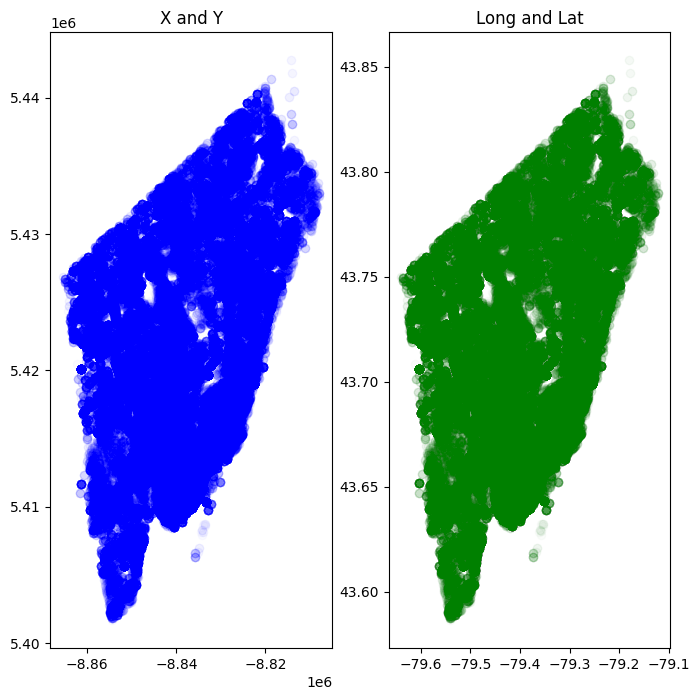

In [30]:
# Finding that X and Y represents longitud and latitude as well
alpha = 0.02
plt.figure(figsize=(8,8))

# X and Y
plt.subplot(121)
plt.scatter(data.X, data.Y, color='blue', alpha=alpha)
plt.title('X and Y')

# Lat and Long
plt.subplot(122)
plt.scatter(data.LONG_WGS84, data.LAT_WGS84, color='green', alpha=alpha)
plt.title('Long and Lat')

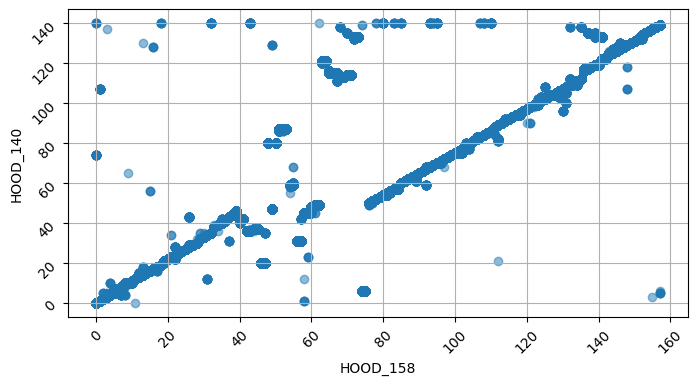

In [31]:
# Deciding between HOOD_158 and HOOD_140. Combine the categories of both variables
combined_categories = pd.concat([data['HOOD_158'], data['HOOD_140']])
label_encoder = LabelEncoder()
label_encoder.fit(combined_categories)
plt.figure(figsize=(8, 4))
plt.scatter(label_encoder.transform(data['HOOD_158']), label_encoder.transform(data['HOOD_140']), alpha=0.5)
plt.xlabel('HOOD_158')
plt.ylabel('HOOD_140')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

In [32]:
# Dropping a few variables based on the feature selection
features_to_drop = ['OFFENCE', 'LOCATION_TYPE', 'LAT_WGS84', 'LONG_WGS84', 'NEIGHBOURHOOD_140', 'HOOD_140',
                    'REPORT_HOUR', 'DIVISION', 'OCC_DATE', 'REPORT_DATE', 'REPORT_YEAR', 'REPORT_DOY', 'REPORT_DOW',
                    'OCC_DOW', 'OCC_DAY', 'REPORT_MONTH', 'OCC_DOY', 'OCC_MONTH', 'REPORT_DAY']
data.drop(columns = features_to_drop, inplace = True)
display(data)

,X,Y,OCC_YEAR,OCC_HOUR,PREMISES_TYPE,UCR_CODE,UCR_EXT,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,-8.809036e+06,5.431523e+06,0,1,6,2,0,0,42,141
2,-8.832825e+06,5.419631e+06,0,0,1,1,0,0,114,133
5,-8.840629e+06,5.412225e+06,0,2,1,2,0,0,140,134
6,-8.839460e+06,5.423396e+06,0,3,5,2,0,0,6,80
7,-8.813613e+06,5.428591e+06,0,3,3,2,0,0,36,138
...,...,...,...,...,...,...,...,...,...,...
372893,-8.849874e+06,5.425325e+06,9,13,3,15,11,2,84,53
372894,-8.832825e+06,5.419631e+06,9,13,0,2,0,0,114,133
372895,-8.838191e+06,5.415297e+06,9,12,1,15,10,2,153,3
372896,-8.851986e+06,5.429799e+06,9,14,5,13,0,3,83,15


Text(0.5, 1.0, 'Major Crime Indicators Dataset')

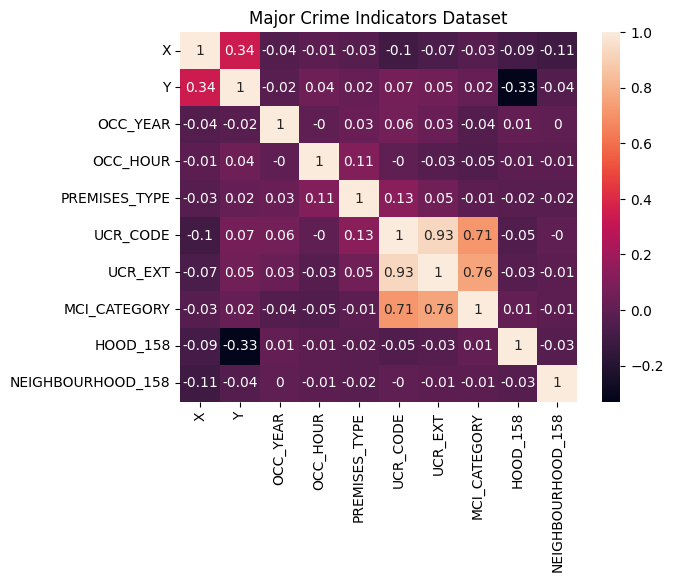

In [33]:
corr = data.corr()
plot = sns.heatmap(corr.round(2), annot = True)
plot.set_title('Major Crime Indicators Dataset')

In [ ]:
# Dropping one of the variables with high correlation UCR_EXT
data.drop(columns = 'UCR_EXT', inplace = True)

In [35]:
# Displaying cleaned data
display(data)

,X,Y,OCC_YEAR,OCC_HOUR,PREMISES_TYPE,UCR_CODE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,-8.809036e+06,5.431523e+06,0,1,6,2,0,42,141
2,-8.832825e+06,5.419631e+06,0,0,1,1,0,114,133
5,-8.840629e+06,5.412225e+06,0,2,1,2,0,140,134
6,-8.839460e+06,5.423396e+06,0,3,5,2,0,6,80
7,-8.813613e+06,5.428591e+06,0,3,3,2,0,36,138
...,...,...,...,...,...,...,...,...,...
372893,-8.849874e+06,5.425325e+06,9,13,3,15,2,84,53
372894,-8.832825e+06,5.419631e+06,9,13,0,2,0,114,133
372895,-8.838191e+06,5.415297e+06,9,12,1,15,2,153,3
372896,-8.851986e+06,5.429799e+06,9,14,5,13,3,83,15
